In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc

In [144]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop('Cabin',axis=1,inplace=True)
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\MOHIT\AppData\Local\Temp\ipykernel_2304\506332026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\MOHIT\AppData\Local\Temp\ipykernel_2304\506332026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [146]:
print(df.duplicated().sum())
df.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [147]:
df = pd.get_dummies(df, columns=[ 'Sex', 'Ticket', 'Embarked'], drop_first=True)

In [148]:
X = df.drop(['Fare', 'PassengerId','Name'],axis=1)
y = df['Fare']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

712
179
712
179


In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

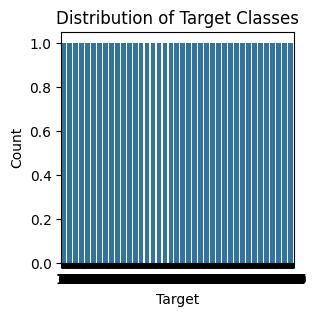

In [151]:
plt.figure(figsize=(3, 3))
sns.countplot(df['Fare'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()

In [152]:
model = LogisticRegression()
y_train_discrete = np.where(y_train >= 0.5, 1, 0)
y_test_discrete = np.where(y_test >= 0.5, 1, 0)
model.fit(X_train, y_train_discrete)

LogisticRegression()

In [153]:
param_grid = {
    'C': [0.1, 1, 10],         
    'penalty': ['l1', 'l2'],    
    'solver': ['liblinear', 'saga']  
}

In [154]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train_discrete)

c:\Users\MOHIT\anaconda3\envs\bia\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [155]:
best_params = grid_search.best_params_
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

In [156]:
model = LogisticRegression(random_state=42, **best_params)
model.fit(X_train, y_train_discrete)

c:\Users\MOHIT\anaconda3\envs\bia\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=0.1, random_state=42, solver='saga')

In [157]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test_discrete, y_pred)

In [158]:
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Model Accuracy on Test Data: 0.99


In [159]:
confusion = confusion_matrix(y_test_discrete, y_pred)

TN, FP, FN, TP = confusion.ravel()
print("Confusion Matrix:\n", confusion)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)


# print('Confusion Matrix:')
# print(confusion)

false_positives = np.where((y_pred == 1) & (y_test_discrete == 0))[0] 
false_negatives = np.where((y_pred == 0) & (y_test_discrete == 1))[0]

print("False Positives (Indices):", false_positives)
print("False Negatives (Indices):", false_negatives)

print("False Positive Data (X_test):", X_test[false_positives])
print("False Negative Data (X_test):", X_test[false_negatives])

Confusion Matrix:
 [[  0   2]
 [  0 177]]
True Negatives (TN): 0
False Positives (FP): 2
False Negatives (FN): 0
True Positives (TP): 177
False Positives (Indices): [ 88 132]
False Negatives (Indices): []
False Positive Data (X_test): [[-0.7769193  -1.61413602  0.67666619 ... -0.05307449 -0.30335547
   0.59248936]
 [-0.7769193  -0.40055118 -0.09263364 ... -0.05307449 -0.30335547
   0.59248936]]
False Negative Data (X_test): []


In [160]:
classification_rep = classification_report(y_test_discrete, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       177

    accuracy                           0.99       179
   macro avg       0.49      0.50      0.50       179
weighted avg       0.98      0.99      0.98       179



c:\Users\MOHIT\anaconda3\envs\bia\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MOHIT\anaconda3\envs\bia\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MOHIT\anaconda3\envs\bia\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [161]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test_discrete, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test_discrete, y_pred_prob)

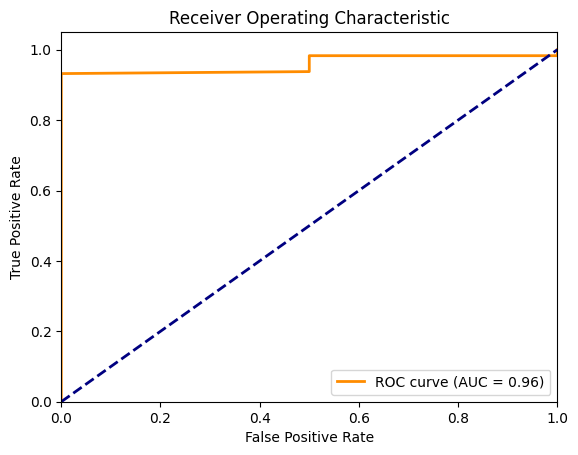

In [162]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()